In [1]:
import torch

In [2]:
from LayoutDM import CLDM

In [3]:
model  = CLDM(use_temp=True)

In [2]:
from image import ImageEncoder

In [10]:
ftr = ImageEncoder(backbone_name='resnet50')

/conda/joonsm/envs/CLDM/lib/python3.9/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [78]:
ftrs = ftr.extractor

In [2]:
import torch

In [79]:
ftrs

ImageFeatureExtractor(
  (body): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Module(
      (0): Module(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (downsample): Module(
          (

In [16]:
ftrs.conv11

Conv2d(2048, 128, kernel_size=(1, 1), stride=(1, 1))

In [34]:
import torch
from transformers import AutoImageProcessor, AutoModel
from PIL import Image
import requests

url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
image = Image.open(requests.get(url, stream=True).raw)

In [59]:
processor = AutoImageProcessor.from_pretrained('facebook/dinov2-base')
inputs = processor(images=image, return_tensors="pt")

In [95]:
import matplotlib.pyplot as plt

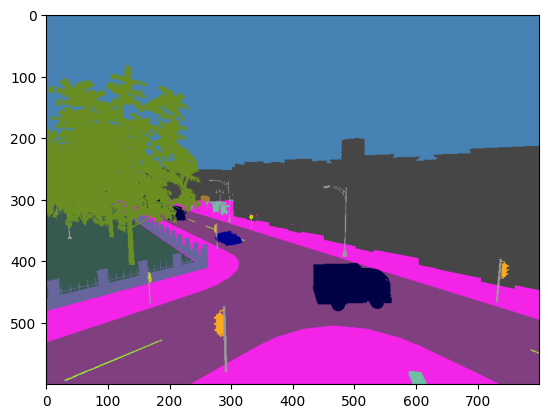

In [106]:
plt.imshow(np.array(image)[:,:,:3])

In [2]:
from PIL import Image
import torch
from torchvision import transforms

# 예시 이미지 열기
image = Image.open('/workspace/joonsm/City_Layout/014602.png')

# 변환 파이프라인 설정
transform = transforms.Compose([
    transforms.Resize((480,480)),  # 이미지 크기 조정 (600, 400)
    transforms.ToTensor()  # PIL 이미지를 텐서로 변환
])

# 이미지 변환
image_tensor = transform(image)[:3,:,:]

print(image_tensor.shape)  # 텐서의 크기 출력


torch.Size([3, 480, 480])


In [3]:
image_tensor = image_tensor.unsqueeze(0)

In [4]:
image_tensor.size()

torch.Size([1, 3, 480, 480])

In [86]:
import numpy as np

In [88]:
np.array(b)

(600, 800, 4)

In [36]:
c =inputs['pixel_values']

In [118]:
ftrs(image_tensor).size()

{'layer3': tensor([[[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 4.1509e-02],
          [9.7429e-01, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 1.2332e-01,
           0.0000e+00, 0.0000e+00],
          ...,
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 6.7029e-01,
           0.0000e+00, 0.0000e+00],
          [0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 4.5410e-01,
           0.0000e+00, 0.0000e+00],
          [1.9600e-01, 1.1653e+00, 0.0000e+00,  ..., 0.0000e+00,
           1.2113e+00, 5.2865e-02]],

         [[1.3107e+00, 6.6996e-01, 1.1639e+00,  ..., 8.7269e-01,
           3.0668e-01, 6.9289e-01],
          [9.7996e-01, 7.7850e-01, 8.8529e-01,  ..., 9.4836e-01,
           7.4356e-01, 7.1030e-01],
          [4.8744e-01, 3.3502e-01, 4.0992e-01,  ..., 5.2039e-01,
           1.7950e-01, 1.0692e-02],
          ...,
          [7.7881e-01, 7.2901e-01, 1.0236e+00,  

torch.Size([1, 256, 38, 25])

In [40]:
h

tensor([[[-2.5519,  1.5728, -3.0123,  ...,  0.4041, -1.4249,  1.6924],
         [-2.3262,  1.8781, -3.0802,  ...,  2.2202, -0.1448,  2.7327],
         [-2.2462,  2.1999, -2.9180,  ...,  1.8511, -0.4341,  2.9525],
         ...,
         [-2.4749,  2.4188, -3.3408,  ...,  1.6880,  1.0499,  2.4366],
         [-1.8227,  0.4626, -3.0218,  ...,  2.1395,  0.4216,  2.4971],
         [-1.9005,  1.9432, -3.8396,  ...,  1.4650,  1.3085,  2.7266]]],
       grad_fn=<AddBackward0>)

In [32]:
l3, l4 = h["layer3"], h["layer4"]

IndexError: too many indices for tensor of dimension 3

In [51]:
from torchvision.models.feature_extraction import create_feature_extractor
import timm

In [52]:
resnet = timm.create_model('resnet50')

In [50]:
return_nodes = {"layer4": "layer4", "layer3": "layer3"}

In [54]:
body = create_feature_extractor(resnet, return_nodes=return_nodes)

In [68]:
l3, l4 = body(src)['layer3'], body(src)['layer4']

In [64]:
src = inputs['pixel_values']

In [71]:
l3.size()

torch.Size([1, 1024, 14, 14])

In [72]:
l4.size()

torch.Size([1, 2048, 7, 7])

In [74]:
import torch.nn as nn

In [1]:
import detectron2

In [3]:
import torch

In [5]:
torch.cuda.is_available()

True

In [7]:
x

SyntaxError: invalid syntax (2412551983.py, line 1)

In [1]:
from detectron2.modeling import META_ARCH_REGISTRY, build_backbone, detector_postprocess

ImportError: libcudart.so.11.0: cannot open shared object file: No such file or directory